# QUELS PUBLICS POUR L'ACTION CULTURELLE ?

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from kiblib.utils.db import DbConn
from kiblib.utils import lucas_sns_params

In [2]:
db_conn = DbConn().create_engine()

In [3]:
query = """SELECT * FROM statdb.stat_action_culturelle"""

In [4]:
last_year = dt.datetime.today().year - 1

In [5]:
action_culturelle = pd.read_sql(query,db_conn)

In [6]:
action_culturelle["date"]= pd.to_datetime(action_culturelle['date'])
print(f"Dernière action enregistrée le {action_culturelle['date'].max().strftime('%d %B %Y')}")

Dernière action enregistrée le 21 December 2024


In [7]:
maj = dt.datetime.today().strftime('%d %B %Y à %Hh%M' )
print(f"Dernière mise à jour de statdb le {maj}")

Dernière mise à jour de statdb le 14 March 2025 à 11h32


> N.B : ***La variable `nombre de participant.es` est une estimation approximative***. Chaque porteur d'action/animation comptabilise le nombre de participants et participantes. Ces chiffres sont transmis à la coordinatrice de l'Action culturelle qui remplit ensuite un tableau chaque semestre. Ces tableaux alimentent la base *statdb* qui a permis de générer ce dashbord.

In [8]:
# On ajoute des colonnes qui seront utiles par al suite.
action_culturelle['nb_actions'] = 1
action_culturelle['mois'] = pd.DatetimeIndex(action_culturelle['date']).month
action_culturelle['jour_semaine'] = pd.DatetimeIndex(action_culturelle['date']).day_name(locale='fr_FR.utf8')
action_culturelle['annee'] = pd.DatetimeIndex(action_culturelle['date']).year

In [9]:
action_culturelle['semestre'] = np.where(action_culturelle['mois'].between(1,6),'semestre 1','semestre 2')

In [10]:
# On filtre les années qu'on souhaite garder : 2019,2022,2023
action_culturelle = action_culturelle[(action_culturelle['annee']>=2019) &
                                      (action_culturelle['annee']!=2020) &
                                      (action_culturelle['annee']!=2021)]

In [11]:
ac_evolution_participants_BySemestre = pd.pivot_table(data=action_culturelle,
            index=['semestre','annee'],
            values='participants',
            aggfunc=sum).reset_index()


In [12]:
ac_evolution_action_BySemestre = pd.pivot_table(data=action_culturelle,
               index=['semestre','annee'],
               values='nb_actions',
               aggfunc=sum
              ).reset_index()

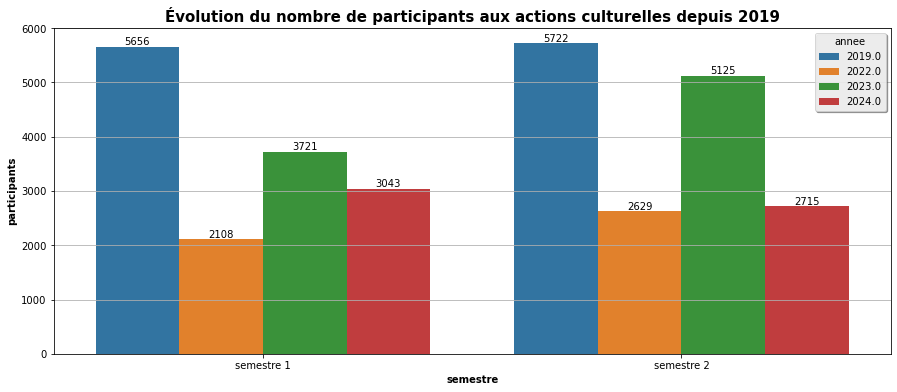

In [13]:
ax= sns.barplot(data=ac_evolution_participants_BySemestre,
                x='semestre',
                y='participants',
                hue='annee',
                estimator=sum
                )

for i in ax.containers:
    ax.bar_label(i,)
    
ax.set_title("Évolution du nombre de participants aux actions culturelles depuis 2019")

plt.show()

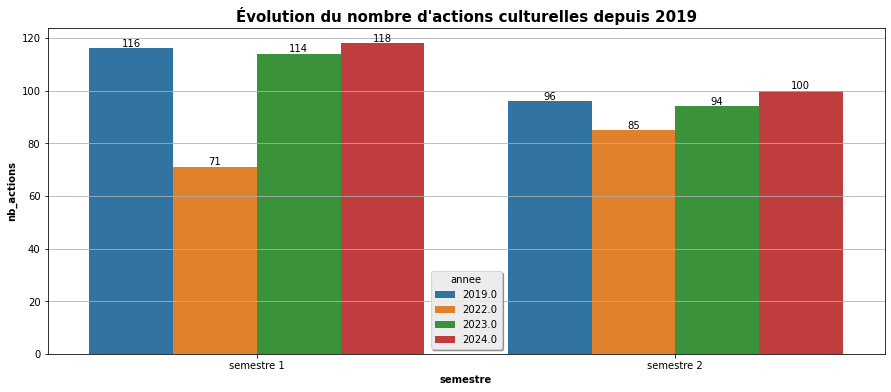

In [14]:
ax = sns.barplot(data=ac_evolution_action_BySemestre,
            x='semestre',
            y='nb_actions',
            hue='annee')

for i in ax.containers:
    ax.bar_label(i,)
    
ax.set_title("Évolution du nombre d'actions culturelles depuis 2019")

plt.show()

In [15]:
ac_evolution_participants_ByYear = pd.pivot_table(data=action_culturelle,
               index='annee',
               values='participants',
               aggfunc=sum
              )

In [16]:
ac_evolution_action_ByYear = pd.pivot_table(data=action_culturelle,
               index='annee',
               values='nb_actions',
               aggfunc=sum
              ).reset_index()

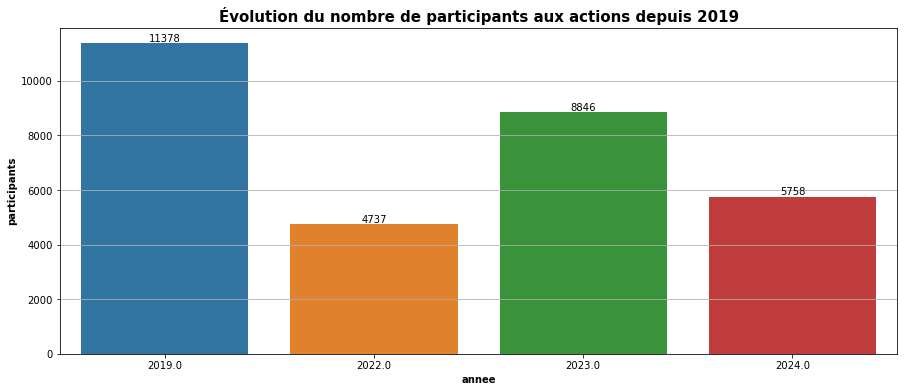

In [17]:
ax = sns.barplot(data=ac_evolution_participants_ByYear,
            x=ac_evolution_participants_ByYear.index,
            y='participants')

for i in ax.containers:
    ax.bar_label(i,)
    
ax.set_title("Évolution du nombre de participants aux actions depuis 2019")

plt.show()

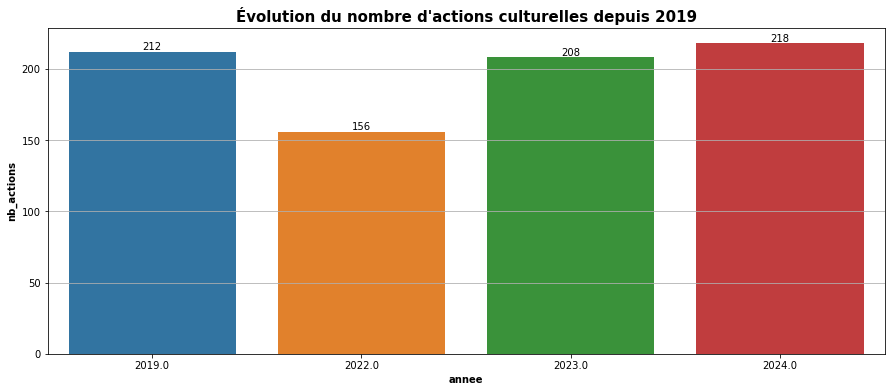

In [18]:
ax = sns.barplot(data=ac_evolution_action_ByYear,
            x='annee',
            y='nb_actions')

for i in ax.containers:
    ax.bar_label(i,)
    
ax.set_title("Évolution du nombre d'actions culturelles depuis 2019")

plt.show()

# 2. Comment a évolué la participation des publics depuis 2019 ?

In [19]:
ac_repartition_2023_ByPublic = pd.pivot_table(data=action_culturelle[action_culturelle['annee']==last_year],
            index='public',
            values='participants',
            aggfunc=sum
           )


In [20]:
ac_evolution_participants_ByPublic = pd.pivot_table(data=action_culturelle,
               index=['public','annee'],
               values='participants',
               aggfunc=sum
           ).reset_index()

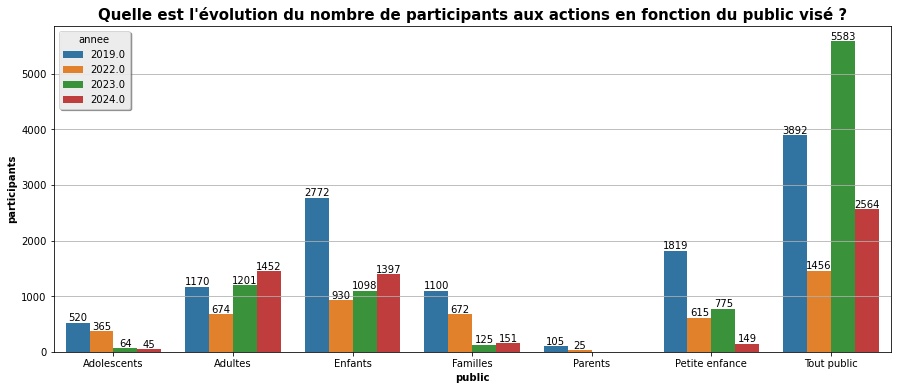

In [21]:
ax = sns.barplot(data=ac_evolution_participants_ByPublic,
            x='public',
            y='participants',
            hue='annee',
            ci=None,
           )

for i in ax.containers:
    ax.bar_label(i,)
    
ax.set_title("Quelle est l'évolution du nombre de participants aux actions en fonction du public visé ?")

plt.show()

In [22]:
ac_evolution_action_ByPublic = pd.pivot_table(data=action_culturelle,
               index=['public','annee'],
               values='nb_actions',
               aggfunc=sum
           ).reset_index()

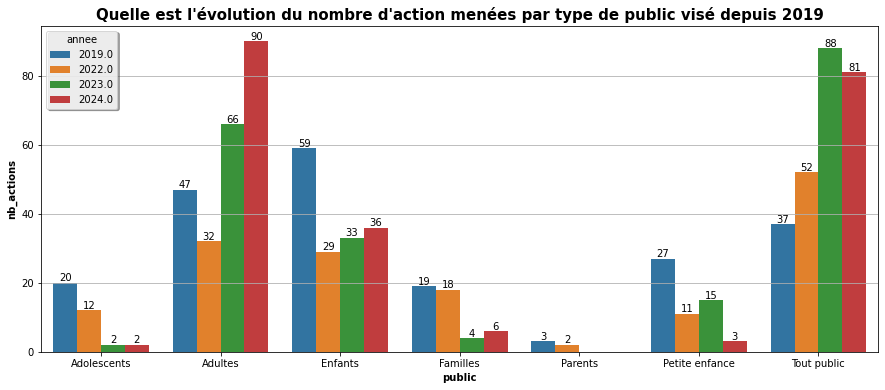

In [23]:
ax = sns.barplot(data=ac_evolution_action_ByPublic,
            x='public',
            y='nb_actions',
            hue='annee',
            ci=None,
           )

for i in ax.containers:
    ax.bar_label(i,)
    
ax.set_title("Quelle est l'évolution du nombre d'action menées par type de public visé depuis 2019")

plt.show()

## Quelle répartition des publics ?

In [24]:
# REPARTITION PAR NOMBRE DE PARTICIPANTS

In [25]:
repartition_participants_ByPublic = pd.pivot_table(data=action_culturelle[action_culturelle['annee']==last_year],index='public',values='participants',aggfunc=sum)

In [26]:
# Il peut arriver qu'une colonne manque, il faudra donc faire un merge de ce tableau 
#sur un df qui contient toutes les cols

In [27]:
# Création d'un dataframe qui contient toutes les colonnes (ici la colonne parents)
data= {'Adolescents': 0,
 'Adultes': 0,
 'Enfants':0,
 'Familles':0,
 'Parents':0,
 'Petite enfance':0,
 'Tout public':0
}

df_modele = pd.DataFrame.from_dict(data, orient='index',columns=['participants'])

In [28]:
# Merge de notre tableau sur le df_modèle
repartition_participants_ByPublic = df_modele.merge(repartition_participants_ByPublic,
                                                    left_on=df_modele.index,
                                                    right_on=repartition_participants_ByPublic.index,
                                                    how='left')

In [29]:
# Permet de renommer la colonne : participant_y → participants

repartition_participants_ByPublic = pd.pivot_table(data=repartition_participants_ByPublic,
                                                      index='key_0',
                                                      values='participants_y',
                                                      fill_value=0,
                                                      aggfunc=sum,
                                                     ).rename(columns={'participants_y':'participants'})

In [30]:
# Permet de renommer le label de l'index : key_0 → public
repartition_participants_ByPublic = repartition_participants_ByPublic.rename_axis('public',axis=0)

In [31]:
repartition_participants_ByPublic['total'] = repartition_participants_ByPublic['participants'].sum() - repartition_participants_ByPublic['participants']

In [32]:
# On filtre le dataframe pour ne garder que les index qui nous intéressent
repartition_participants_ByPublicAdos = repartition_participants_ByPublic[repartition_participants_ByPublic.index=='Adolescents']
repartition_participants_ByPublicAdultes = repartition_participants_ByPublic[repartition_participants_ByPublic.index=='Adultes']
repartition_participants_ByPublicEnfants = repartition_participants_ByPublic[repartition_participants_ByPublic.index=='Enfants']
repartition_participants_ByPublicFamilles = repartition_participants_ByPublic[repartition_participants_ByPublic.index=='Familles']
repartition_participants_ByPublicParents = repartition_participants_ByPublic[repartition_participants_ByPublic.index=='Parents']
repartition_participants_ByPublicPE = repartition_participants_ByPublic[repartition_participants_ByPublic.index=='Petite enfance']
repartition_participants_ByPublicToutPublic = repartition_participants_ByPublic[repartition_participants_ByPublic.index=='Tout public']

In [33]:
# Permet de rebasculer chaque public en category et le nb_participants et le total en index (pour faire marcher graphs seaborn)

repartition_participants_ByPublicAdo = repartition_participants_ByPublic.iloc[0].to_frame()
repartition_participants_ByPublicAdultes = repartition_participants_ByPublic.iloc[1].to_frame()
repartition_participants_ByPublicEnfants = repartition_participants_ByPublic.iloc[2].to_frame()
repartition_participants_ByPublicFamilles = repartition_participants_ByPublic.iloc[3].to_frame()
repartition_participants_ByPublicParents = repartition_participants_ByPublic.iloc[4].to_frame()
repartition_participants_ByPublicPE = repartition_participants_ByPublic.iloc[5].to_frame()
repartition_participants_ByPublicTousPublics = repartition_participants_ByPublic.iloc[6].to_frame()

In [34]:
 # PAR NOMBRE D'ACTIONS MENÉES

In [35]:
repartition_actions_ByPublic = pd.pivot_table(data=action_culturelle[action_culturelle['annee']==last_year],index='public',values='nb_actions',aggfunc=sum)

In [36]:
repartition_actions_ByPublic = df_modele.merge(repartition_actions_ByPublic,
                                                    left_on=df_modele.index,
                                                    right_on=repartition_actions_ByPublic.index,
                                                    how='left')

In [37]:
# Permet de renommer la colonne : participant_y → actions
repartition_actions_ByPublic = pd.pivot_table(data=repartition_actions_ByPublic,
                                                      index='key_0',
                                                      values='nb_actions',
                                                      fill_value=0,
                                                      aggfunc=sum,
                                                     ).rename(columns={'actions_y':'actions'})


In [38]:
repartition_actions_ByPublic = repartition_actions_ByPublic.rename_axis('public',axis=0)

In [39]:
repartition_actions_ByPublic['total'] = repartition_actions_ByPublic['nb_actions'].sum() - repartition_actions_ByPublic['nb_actions']


In [40]:
# On filtre le dataframe pour ne garder que les index qui nous intéressent
repartition_actions_ByPublicAdos = repartition_actions_ByPublic[repartition_actions_ByPublic.index=='Adolescents']
repartition_actions_ByPublicAdultes = repartition_actions_ByPublic[repartition_actions_ByPublic.index=='Adultes']
repartition_actions_ByPublicEnfants = repartition_actions_ByPublic[repartition_actions_ByPublic.index=='Enfants']
repartition_actions_ByPublicFamilles = repartition_actions_ByPublic[repartition_actions_ByPublic.index=='Familles']
repartition_actions_ByPublicParents = repartition_actions_ByPublic[repartition_actions_ByPublic.index=='Parents']
repartition_actions_ByPublicPE = repartition_actions_ByPublic[repartition_actions_ByPublic.index=='Petite enfance']
repartition_actions_ByPublicToutPublic = repartition_actions_ByPublic[repartition_actions_ByPublic.index=='Tout public']

In [41]:
# Permet de rebasculer chaque public en category et le nb_actions et le total en index (pour faire marcher graphs seaborn)
repartition_actions_ByPublicAdo = repartition_actions_ByPublic.iloc[0].to_frame()
repartition_actions_ByPublicAdultes = repartition_actions_ByPublic.iloc[1].to_frame()
repartition_actions_ByPublicEnfants = repartition_actions_ByPublic.iloc[2].to_frame()
repartition_actions_ByPublicFamilles = repartition_actions_ByPublic.iloc[3].to_frame()
repartition_actions_ByPublicParents = repartition_actions_ByPublic.iloc[4].to_frame()
repartition_actions_ByPublicPE = repartition_actions_ByPublic.iloc[5].to_frame()
repartition_actions_ByPublicTousPublics = repartition_actions_ByPublic.iloc[6].to_frame()

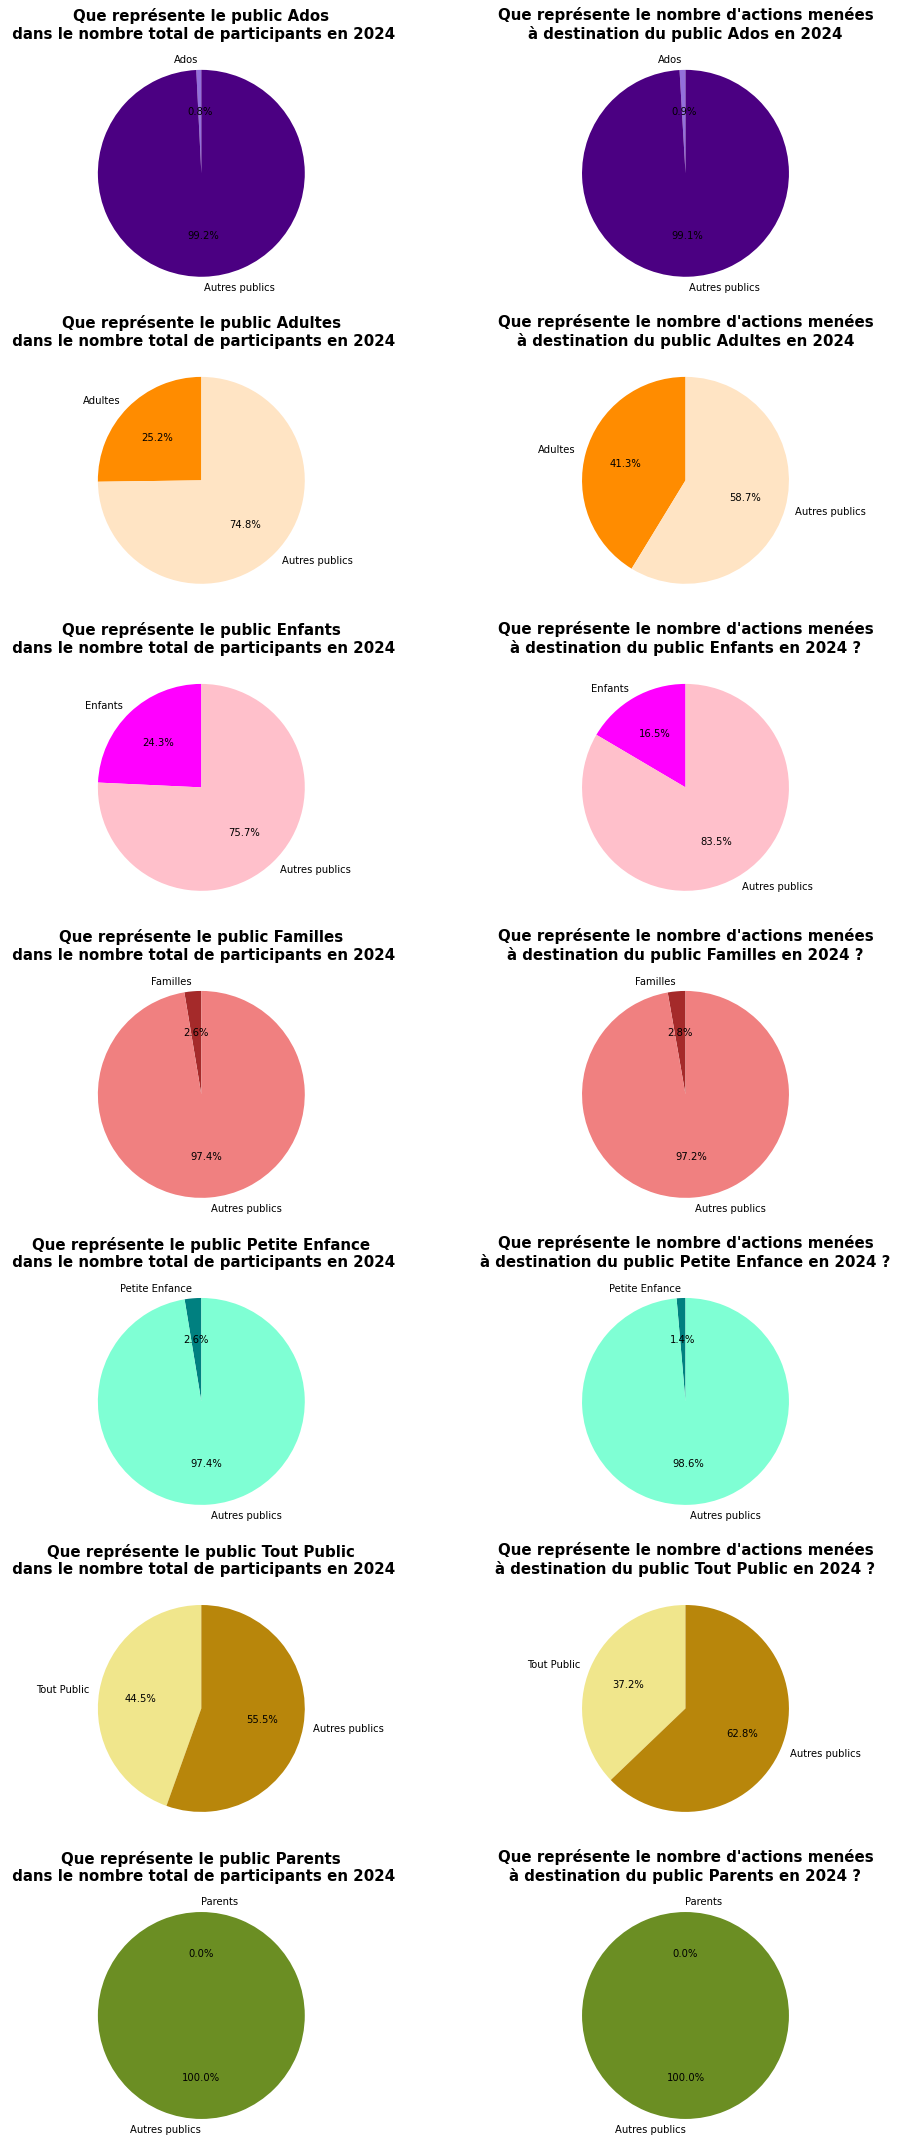

In [42]:
f,axs = plt.subplots(nrows=7,ncols=2,figsize=(15,30))

#1ER GRAPHIQUE
axs[0,0].pie(x=repartition_participants_ByPublicAdo['Adolescents'],
             startangle=90,
             labels=['Ados','Autres publics'],
             colors=['mediumpurple','indigo'],
             autopct='%1.1f%%')
axs[0,0].set_title(f"Que représente le public Ados\n dans le nombre total de participants en {last_year}")

axs[0,1].pie(x=repartition_actions_ByPublicAdo['Adolescents'],
             startangle=90,
             labels=['Ados','Autres publics'],
             colors=['mediumpurple','indigo'],
             autopct='%1.1f%%')
axs[0,1].set_title(f"Que représente le nombre d'actions menées\nà destination du public Ados en {last_year}")

#2E GRAPHIQUE
axs[1,0].pie(x=repartition_participants_ByPublicAdultes['Adultes'],
             startangle=90,
             labels=['Adultes','Autres publics'],
             colors=['darkorange','bisque'],
             autopct='%1.1f%%')
axs[1,0].set_title(f"Que représente le public Adultes\n dans le nombre total de participants en {last_year}")


axs[1,1].pie(x=repartition_actions_ByPublicAdultes['Adultes'],
             startangle=90,
             labels=['Adultes','Autres publics'],
             colors=['darkorange','bisque'],
             autopct='%1.1f%%')
axs[1,1].set_title(f"Que représente le nombre d'actions menées\nà destination du public Adultes en {last_year}")


#3E GRAPHIQUE
axs[2,0].pie(x=repartition_participants_ByPublicEnfants['Enfants'],
             startangle=90,
             labels=['Enfants','Autres publics'],
             colors=['magenta','pink'],
             autopct='%1.1f%%'
            )
axs[2,0].set_title(f"Que représente le public Enfants\n dans le nombre total de participants en {last_year}")


axs[2,1].pie(x=repartition_actions_ByPublicEnfants['Enfants'],
             startangle=90,
             labels=['Enfants','Autres publics'],
             colors=['magenta','pink'],
             autopct='%1.1f%%'
            )
axs[2,1].set_title(f"Que représente le nombre d'actions menées\nà destination du public Enfants en {last_year} ?")


#4E GRAPHIQUE
axs[3,0].pie(x=repartition_participants_ByPublicFamilles['Familles'],
             startangle=90,
             labels=['Familles','Autres publics'],
             colors=['brown','lightcoral'],
             autopct='%1.1f%%'
            )

axs[3,0].set_title(f"Que représente le public Familles\n dans le nombre total de participants en {last_year}")


axs[3,1].pie(x=repartition_actions_ByPublicFamilles['Familles'],
             startangle=90,
             labels=['Familles','Autres publics'],
             colors=['brown','lightcoral'],
             autopct='%1.1f%%'
            )

axs[3,1].set_title(f"Que représente le nombre d'actions menées\nà destination du public Familles en {last_year} ?")


#5E GRAPHIQUE
axs[4,0].pie(x=repartition_participants_ByPublicPE['Petite enfance'],
             startangle=90,
             labels=['Petite Enfance','Autres publics'],
             colors=['teal','aquamarine'],
             autopct='%1.1f%%'
            )

axs[4,0].set_title(f"Que représente le public Petite Enfance\n dans le nombre total de participants en {last_year}")

axs[4,1].pie(x=repartition_actions_ByPublicPE['Petite enfance'],
             startangle=90,
             labels=['Petite Enfance','Autres publics'],
             colors=['teal','aquamarine'],
             autopct='%1.1f%%'
            )

axs[4,1].set_title(f"Que représente le nombre d'actions menées\nà destination du public Petite Enfance en {last_year} ?")


#6E GRAPHIQUE
axs[5,0].pie(x=repartition_participants_ByPublicTousPublics['Tout public'],
             startangle=90,
             labels=['Tout Public','Autres publics'],
             colors=['khaki','darkgoldenrod'],
             autopct='%1.1f%%'
            )

axs[5,0].set_title(f"Que représente le public Tout Public\n dans le nombre total de participants en {last_year}")

axs[5,1].pie(x=repartition_actions_ByPublicTousPublics['Tout public'],
             startangle=90,
             labels=['Tout Public','Autres publics'],
             colors=['khaki','darkgoldenrod'],
             autopct='%1.1f%%'
            )
axs[5,1].set_title(f"Que représente le nombre d'actions menées\nà destination du public Tout Public en {last_year} ?")


# 7E GRAPHIQUE
axs[6,0].pie(x=repartition_participants_ByPublicParents['Parents'],
       startangle=90,
       labels=['Parents','Autres publics'],
       colors=['yellowgreen','olivedrab'],
       autopct='%1.1f%%')
axs[6,0].set_title(f"Que représente le public Parents\n dans le nombre total de participants en {last_year}")

axs[6,1].pie(x=repartition_actions_ByPublicParents['Parents'],
       startangle=90,
       labels=['Parents','Autres publics'],
       colors=['yellowgreen','olivedrab'],
       autopct='%1.1f%%')
axs[6,1].set_title(f"Que représente le nombre d'actions menées\nà destination du public Parents en {last_year} ?")



f.tight_layout()
plt.show()